# Homework 13

In [1]:
# Read in the .csv vile

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("photoelectric_data.csv",index_col= 0)
df

,Frequency(Hz),Stopping Potential (Vs),Vs error
0,1.000000e+14,0.011488,0.500000
1,1.189542e+14,0.046829,0.892476
2,1.379085e+14,0.214358,0.813277
3,1.568627e+14,0.746192,1.019619
4,1.758170e+14,0.050116,0.859264
5,1.947712e+14,0.332804,1.243297
6,2.137255e+14,0.019222,1.232804
7,2.326797e+14,0.272502,0.836485
8,2.516340e+14,0.066664,0.877474
9,2.705882e+14,0.168313,0.662371


<ErrorbarContainer object of 3 artists>

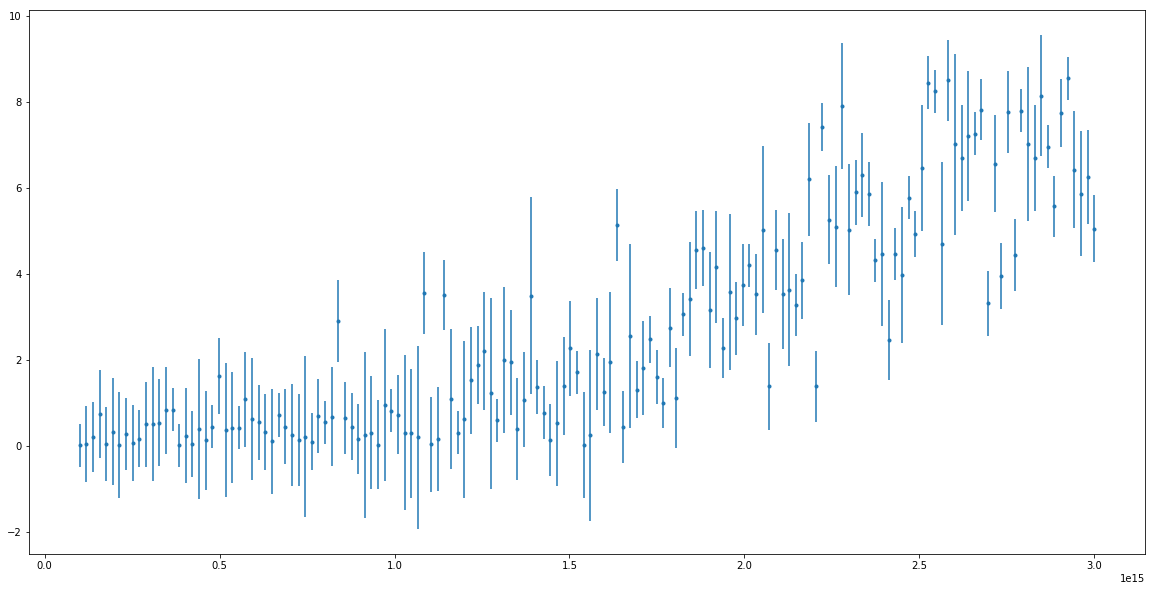

In [4]:
plt.figure(figsize = (20,10))
plt.errorbar(df['Frequency(Hz)'], df["Stopping Potential (Vs)"], yerr = df["Vs error"], fmt = '.')

In [5]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 7/linfit.py'
import numpy as np
def linfit(x, y, sigma_y):
    """
    Make a least-squares fit to data with a straight line f(x) = a + b*x.
    
    Inputs
    ----------
    x: independent variable
    y: dependent variable
    sigma_y: uncertainties in the dependent variable
    
    Output
    ----------
    a +- da: y intercept and its uncertainty
    b +- db: slope and its uncertainty
    redchi2: reduced chi-squared
    """
    
    # Validate input.
    npar = 2       # number of fitting parameters
    npts = len(x)  # number of data points
    if npts < npar:
        print("Not enough data points to fit a first order polynomial.")
        return
    if npts != len(y) or npts != len(sigma_y):
        print("Input arrays must be the same length: len(x) = {}, len(y) = {},"
              "len(sigma_y) = {}".format(len(x),len(y),len(sigma_y)))
        return
    
    # Convert input to np.array to facilitate math.
    x = np.array(x)
    y = np.array(y)
    sigma_y = np.array(sigma_y)
    
    # Accumulate weighted sums.
    sw  = sum( 1    / sigma_y**2 )
    sy  = sum( y    / sigma_y**2 )
    sx  = sum( x    / sigma_y**2 )
    sx2 = sum( x**2 / sigma_y**2 )
    sxy = sum( y*x  / sigma_y**2 )

    # Evaluate the fit parameters.
    Delta = sw*sx2 - sx*sx

    a = (sx2*sy - sx*sxy) / Delta
    b = (sxy*sw - sx*sy) / Delta
    da = np.sqrt( sx2 / Delta )
    db = np.sqrt( sw  / Delta )
    
    # Construct reduced chi-squared
    fit = a + b*x
    chi2 = sum(((y - fit) / sigma_y)**2)
    if npts > npar:
        redchi2 = chi2 / (npts - npar)
    else: # perfect fit for npts data points and (npts-1)th-order polynomial
        redchi2 = 0
    
    return [a, da, b, db, redchi2] 


In [6]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 7/linfit.py'
import numpy as np
def linfit_c(x, y, sigma_y):
    """
    Make a least-squares fit to data with a straight line f(x) = a.
    
    Inputs
    ----------
    x: independent variable
    y: dependent variable
    sigma_y: uncertainties in the dependent variable
    
    Output
    ----------
    c:       Constant value that  
    redchi2: reduced chi-squared
    """
    
    # Validate input.
    npar = 2       # number of fitting parameters
    npts = len(x)  # number of data points
    if npts < npar:
        print("Not enough data points to fit a first order polynomial.")
        return
    if npts != len(y) or npts != len(sigma_y):
        print("Input arrays must be the same length: len(x) = {}, len(y) = {},"
              "len(sigma_y) = {}".format(len(x),len(y),len(sigma_y)))
        return
    
    # Convert input to np.array to facilitate math.
    x = np.array(x)
    y = np.array(y)
    sigma_y = np.array(sigma_y)
    
    # Accumulate weighted sums.
    sw  = sum( 1    / sigma_y**2 )
    sy  = sum( y    / sigma_y**2 )
    
    # Evaluate the fit parameters.
    c = sy / sw
    
    # Construct reduced chi-squared
    fit = c
    chi2 = sum(((y - fit) / sigma_y)**2)
    if npts > npar:
        redchi2 = chi2 / (npts - npar)
    else: # perfect fit for npts data points and (npts-1)th-order polynomial
        redchi2 = 0
    
    return [c, redchi2] 


In [7]:
# %load '/home/cody/Physics 331/Textbook Programs/Chapter 7/linfit.py'
import numpy as np
def linfit_dx(x, y, sigma_y):
    """
    Make a least-squares fit to data with a straight line f(x) = dx.
    
    Inputs
    ----------
    x: independent variable
    y: dependent variable
    sigma_y: uncertainties in the dependent variable
    
    Output
    ----------
    d:       Slope of the line used to fit the data  
    redchi2: reduced chi-squared
    """
    
    # Validate input.
    npar = 2       # number of fitting parameters
    npts = len(x)  # number of data points
    if npts < npar:
        print("Not enough data points to fit a first order polynomial.")
        return
    if npts != len(y) or npts != len(sigma_y):
        print("Input arrays must be the same length: len(x) = {}, len(y) = {},"
              "len(sigma_y) = {}".format(len(x),len(y),len(sigma_y)))
        return
    
    # Convert input to np.array to facilitate math.
    x = np.array(x)
    y = np.array(y)
    sigma_y = np.array(sigma_y)
    
    # Accumulate weighted sums.
    sx2  = sum( x**2 / sigma_y**2 )
    sxy  = sum( x*y / sigma_y**2 )
    
    # Evaluate the fit parameters.
    d = sxy / sx2
    
    # Construct reduced chi-squared
    fit = d*x
    chi2 = sum(((y - fit) / sigma_y)**2)
    if npts > npar:
        redchi2 = chi2 / (npts - npar)
    else: # perfect fit for npts data points and (npts-1)th-order polynomial
        redchi2 = 0
    
    return [d, redchi2] 


In [8]:
data = pd.read_csv("photoelectric_data.csv",index_col= 0)
def plotfit(data):
    f = data["Frequency(Hz)"].values
    Vs = data['Stopping Potential (Vs)'].values
    err = data['Vs error'].values
    fitpar = linfit(f, Vs, err)
    fitpar2 = linfit_c(f, Vs, err)
    fitpar3 = linfit_dx(f, Vs, err)
    xfit = np.array([f[0], f[-1]])
    yfit = fitpar[0] + fitpar[2]*xfit
    
    plt.figure(figsize = (10,10))
    plt.errorbar(f, Vs, yerr = err, fmt = '.', label = 'Data')
    plt.plot(xfit, yfit,
             label = "Best fit a+bx, a = {:2e}, b = {:2e}, $\chi^2$ = {}".format(fitpar[0], fitpar[2], fitpar[4]))
    
    plt.plot(xfit, [fitpar2[0]]*len(xfit),
             label = "Best fit constant, c = {:2e}, $\chi^2$ = {}".format(fitpar2[0], fitpar2[1]))
    plt.plot(xfit, fitpar3[0]*xfit,
             label = "Best fit dx, d = {:2e}, $\chi^2$ = {}".format(fitpar3[0], fitpar3[1]))
    
    plt.ylabel('Stopping Potential (V)')
    plt.xlabel("Frequency (Hz)")
    plt.legend()

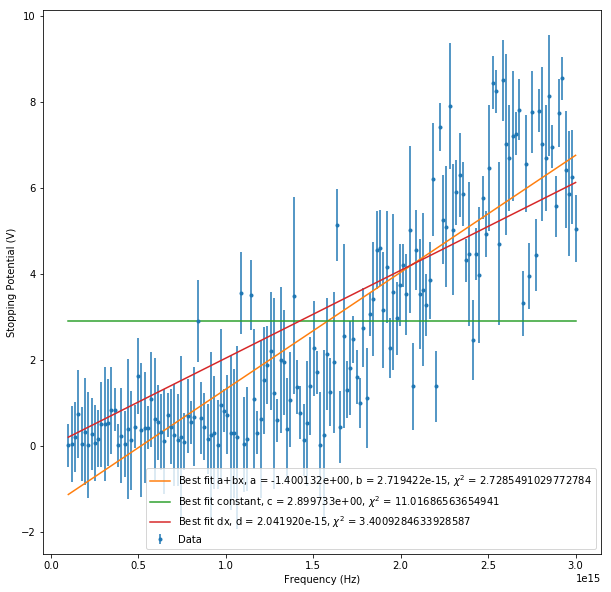

In [9]:
plotfit(data)

Looking at the reduced $\chi^2$ the best fit to the data is the a+bx model with a $\chi^2$ of 2.728. 

We know the stopping potential should be
\begin{equation}
		V_s(\nu) = \frac{h\nu}{e} - \frac{\phi}{e}
\end{equation}
So looking at our best fit paramiters we can see that
$\frac{h}{e} = b$, and $\frac{\phi}{e} = a$. Using these values we can find values for $h$ and the work function $\phi$

In [10]:
fits = linfit(df['Frequency(Hz)'], df["Stopping Potential (Vs)"], df["Vs error"])

In [11]:
e = 1.602e-19
h = fits[2]*e
phi = -fits[0]*e
print("Plancks Constant h = {}, Work Function $\phi$ = {}".format(h, phi))

Plancks Constant h = 4.356514653274755e-34, Work Function $\phi$ = 2.2430106939188584e-19


The accepted values for these are 6.62607004 × 10-34 and 7.5302e-19. So we're in the right order of magnitude but we're off by a fair bit. 

Why is this?

This is because of all the zeros in our data. The function for the stopping potential gives negative values below the cut off frequency. So we should ignore all data points that are below some cut off frequency. Analyticly we can find that the cut off frequency is $\nu_{cut}$ = 1.13e15 Hz. So we want to cut out all frequency measurments less than that frequency. 

In [12]:
df = df[df['Frequency(Hz)'] > 1.13e15]  # Only keep frequencies above 1.13e15 Hz

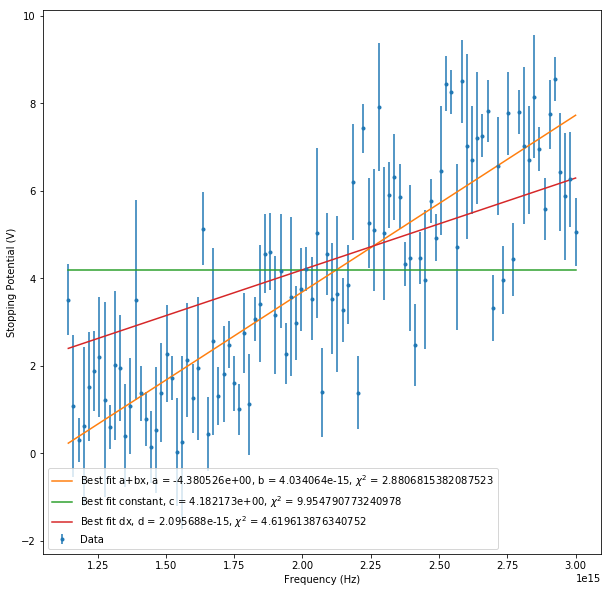

In [13]:
plotfit(df)

In [14]:
fits = linfit(df['Frequency(Hz)'], df["Stopping Potential (Vs)"], df["Vs error"])
e = 1.602e-19
h = fits[2]*e
phi = -fits[0]*e
print("Plancks Constant h = {}, Work Function $\phi$ = {}".format(h, phi))

Plancks Constant h = 6.462570448018981e-34, Work Function $\phi$ = 7.017602654655567e-19


Much better!